In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import podpac

C:\Anaconda3\envs\podpac\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
import h5py
import xarray as xr
import zarr as zr

In [35]:
path = r"\\Olympus\Projects\1010115-PIPELINE-II\Technical Work\FromMIT\beta_params_moving.mat"
outpath = path.replace('.mat', '.zarr')

In [5]:
categories = h5py.File(path)

In [6]:
categories.keys()

<KeysViewHDF5 ['D', 'a', 'b', 'lat_region', 'lon_region']>

In [7]:
categories['D'].shape

(5, 365, 626, 276)

In [8]:
lat = categories['lat_region'][:]
lon = categories['lon_region'][:]

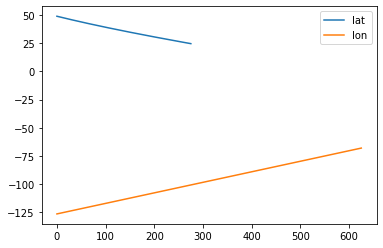

In [9]:
plot(lat[0, :])
plot(lon[:, 0])
legend(['lat', 'lon'])

In [10]:
D = np.moveaxis(categories['D'][:], 0, -1)
D.shape

(365, 626, 276, 5)

In [22]:
native_coords = podpac.Coordinates([
    podpac.crange('2018-01-01', '2018-12-31', '1,D'),
    lon[:, 0], lat[0, :]],
    ['time', 'lon', 'lat'])
native_coords

Coordinates (EPSG:4326)
	time: UniformCoordinates1d(time): Bounds[2018-01-01, 2018-12-31], N[365], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-126.3641128540039, -68.01348876953125], N[626], ctype['midpoint']
	lat: ArrayCoordinates1d(lat): Bounds[24.557823181152344, 48.84467697143555], N[276], ctype['midpoint']

In [23]:
n = podpac.Node(outputs=['d0', 'd1', 'd2', 'd3', 'd4'])

In [24]:
o = n.create_output_array(native_coords, D)
o

<xarray.UnitsDataArray (time: 365, lon: 626, lat: 276, output: 5)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * lon      (lon) float64 -126.4 -126.3 -126.2 -126.1 ... -68.2 -68.11 -68.01
  * lat      (lat) float64 48.84 48.74 48.63 48.53 ... 24.79 24.71 24.64 24.56
  * output   (output) <U2 'd0' 'd1' 'd2' 'd3' 'd4'
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000001E80B079400>
    crs:          EPSG:4326

In [45]:
oc = o.chunk((94, 64, 64))
oc.serialize()

In [46]:
ds = oc.to_dataset(dim='output')
ds

<xarray.Dataset>
Dimensions:  (lat: 276, lon: 626, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * lon      (lon) float64 -126.4 -126.3 -126.2 -126.1 ... -68.2 -68.11 -68.01
  * lat      (lat) float64 48.84 48.74 48.63 48.53 ... 24.79 24.71 24.64 24.56
Data variables:
    d0       (time, lon, lat) float64 dask.array<shape=(365, 626, 276), chunksize=(94, 64, 64)>
    d1       (time, lon, lat) float64 dask.array<shape=(365, 626, 276), chunksize=(94, 64, 64)>
    d2       (time, lon, lat) float64 dask.array<shape=(365, 626, 276), chunksize=(94, 64, 64)>
    d3       (time, lon, lat) float64 dask.array<shape=(365, 626, 276), chunksize=(94, 64, 64)>
    d4       (time, lon, lat) float64 dask.array<shape=(365, 626, 276), chunksize=(94, 64, 64)>
Attributes:
    layer_style:  {}
    crs:          EPSG:4326

In [47]:
ds.chunks

Frozen(SortedKeysDict({'time': (94, 94, 94, 83), 'lon': (64, 64, 64, 64, 64, 64, 64, 64, 64, 50), 'lat': (64, 64, 64, 64, 20)}))

In [48]:
ds.to_zarr(outpath)

C:\Anaconda3\envs\podpac\lib\site-packages\xarray\coding\times.py:244: FutureWarning: the 'box' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'box'
  dates = pd.to_datetime(dates, box=False)
